In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
folder_path = "results/"
file = "final.txt"

filepath = folder_path + file
ds = pd.read_csv(filepath, delim_whitespace=True, header=None, names=None)
new_column_names = ["x", "y", "vorticity", "stream function", "u-velocity", "v-velocity"]
ds.columns = new_column_names

In [3]:
Nx = len(np.unique(ds['x']))
Ny = len(np.unique(ds['y']))

X = ds['x'].values.reshape(Nx, Ny)
Y = ds['y'].values.reshape(Nx, Ny)
Vorticity = ds['vorticity'].values.reshape(Nx, Ny)
Stream = ds['stream function'].values.reshape(Nx, Ny)
U = ds['u-velocity'].values.reshape(Nx, Ny)
V = ds['v-velocity'].values.reshape(Nx, Ny)

In [4]:
def plot_contour(ax, X, Y, Z, title, levels=50, cmap='jet'):

    cf = ax.contourf(X, Y, Z, levels, cmap=cmap)
    cbar = plt.colorbar(cf, ax=ax)
    cbar.set_label(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title+' contour plot')
    ax.grid(False)

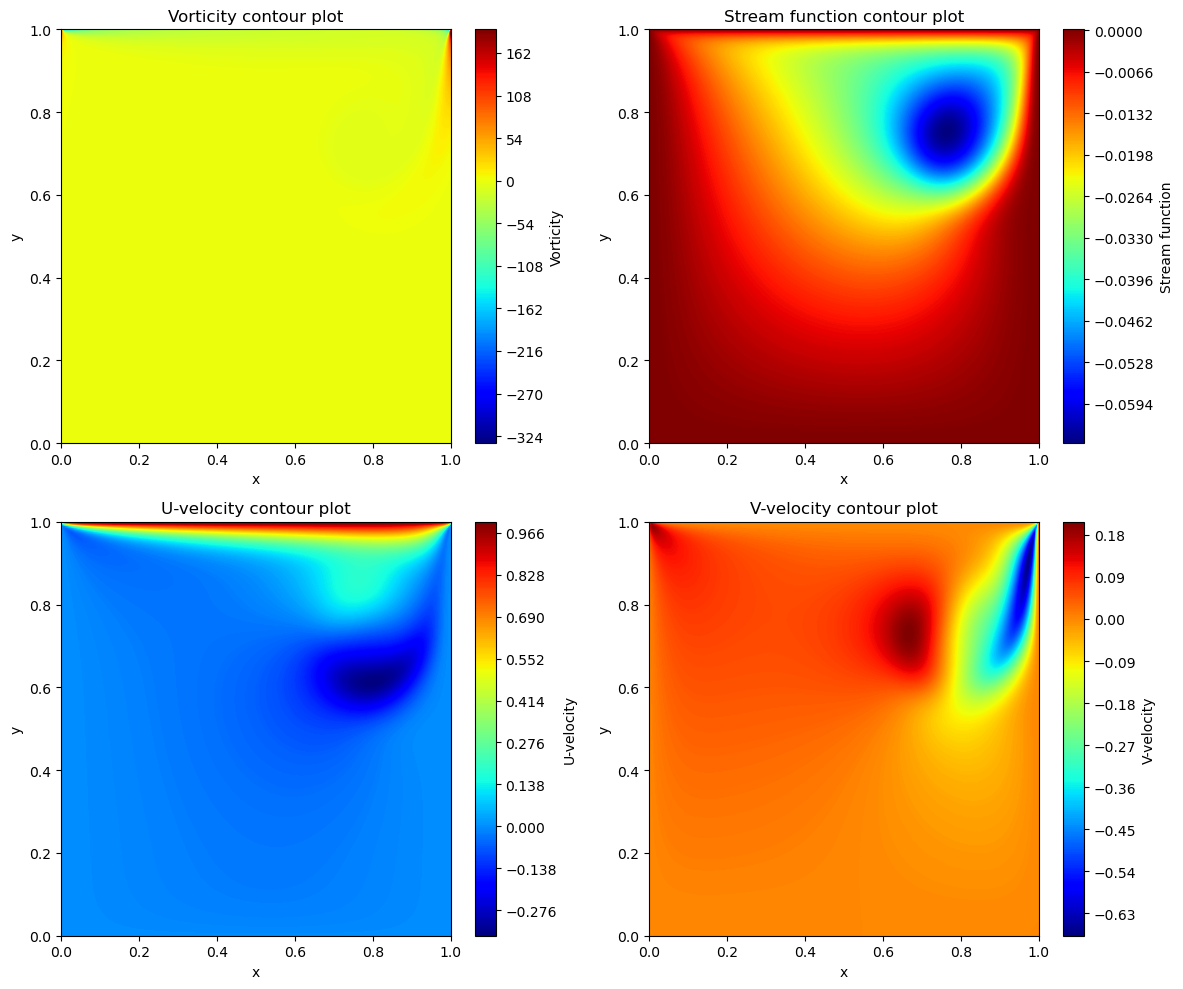

In [5]:
data = [(X, Y, Vorticity, 'Vorticity'),
        (X, Y, Stream, 'Stream function'),
        (X, Y, U, 'U-velocity'),
        (X, Y, V, 'V-velocity')]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot each subplot
for ax, (X, Y, Z, title) in zip(axs.ravel(), data):
    plot_contour(ax, X, Y, Z, title, levels=500)

plt.tight_layout()
plt.savefig(folder_path+'Results.png')
plt.show()

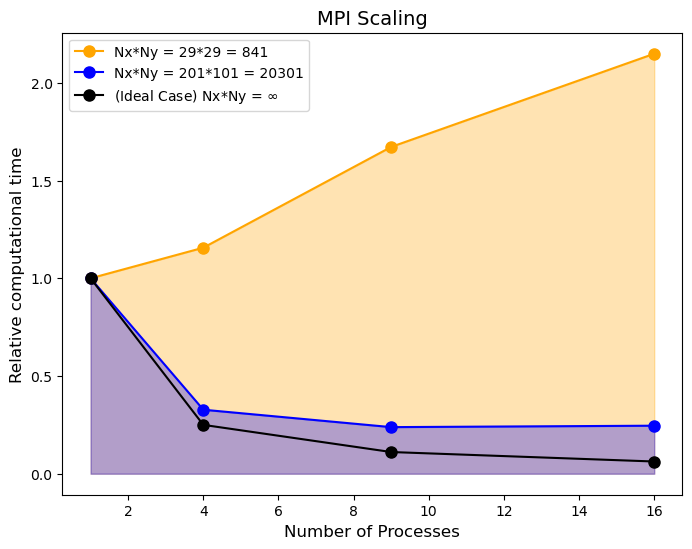

In [6]:
# Fluid configuration
# Lx=1 Ly=1 Nx=201 Ny=101 Re=1000 dt=0.005 T=10 Nt=1
# y = [3078.48,684.713,407.762,410.149]
# [532.126]

x = np.array([1,4,9,16])
y_light = np.array([26.8474, 31.0532, 44.8975, 57.7006]) # Nx = 29 Ny = 29
y_medium = np.array([983.495, 322.131, 234.513, 241.696]) # Nx = 201 Ny = 101
y_ideal = np.array([1,0.25,0.111,0.0625])


y_light= y_light/y_light[0]
y_medium = y_medium/y_medium[0]


legend = ["Nx*Ny = 29*29 = 841", "Nx*Ny = 201*101 = 20301", r"(Ideal Case) Nx*Ny = $\infty$" ]


# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y_light, color='orange', linestyle='-', marker='o', markersize=8, label='Line')
plt.plot(x, y_medium, color='blue', linestyle='-', marker='o', markersize=8, label='Line')

plt.plot(x, y_ideal, color='black', linestyle='-', marker='o', markersize=8, label='Line')


plt.fill_between(x, y_light, color='orange', alpha=0.3)
plt.fill_between(x, y_medium, color='blue', alpha=0.3)

plt.xlabel("Number of Processes", fontsize=12)
plt.ylabel("Relative computational time", fontsize=12)
plt.legend(legend)
plt.title("MPI Scaling", fontsize=14)
plt.savefig(folder_path + 'MPI_Scaling.png', dpi=300, bbox_inches='tight')
plt.show()

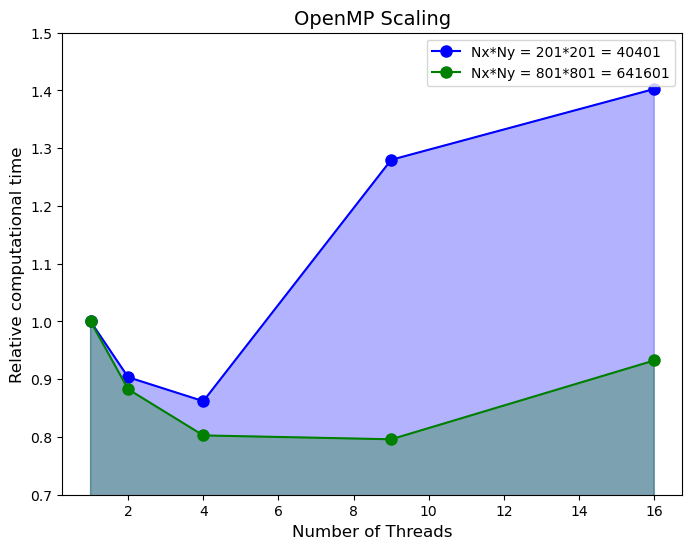

In [22]:
x_nt = np.array([1,2,4,9,16])
y_nt_medium = np.array([153.24, 138.454, 132.096, 196.134, 214.932]) # Nx = 201 Ny = 201
y_nt_heavy = np.array([8471.99, 7477.85, 6800.45, 6743.61, 7899.79]) # make run verbose=true Np=1 Nx=801 Ny=801 dt=0.0003 T=0.03 Re=1000 Nt=16


y_nt_medium = y_nt_medium/y_nt_medium[0]
y_nt_heavy = y_nt_heavy/y_nt_heavy[0]


legend_nt = ["Nx*Ny = 201*201 = 40401", "Nx*Ny = 801*801 = 641601"]


# Create the plot
plt.figure(figsize=(8, 6))
# plt.plot(x, y_light, color='orange', linestyle='-', marker='o', markersize=8, label='Line')
plt.plot(x_nt, y_nt_medium, color='blue', linestyle='-', marker='o', markersize=8, label='Line')
plt.plot(x_nt, y_nt_heavy, color='green', linestyle='-', marker='o', markersize=8, label='Line')


# plt.fill_between(x, y_light, color='orange', alpha=0.3)
plt.fill_between(x_nt, y_nt_medium, color='blue', alpha=0.3)
plt.fill_between(x_nt, y_nt_heavy, color='green', alpha=0.3)


plt.xlabel("Number of Threads", fontsize=12)
plt.ylabel("Relative computational time", fontsize=12)
plt.legend(legend_nt)
plt.title("OpenMP Scaling", fontsize=14)
plt.ylim([0.7,1.5])
plt.savefig(folder_path + 'OpenMP_Scaling.png', dpi=300, bbox_inches='tight')
plt.show()